# Plot and Tabulate Grid Refinement Studies

In [4]:
using CLOUD
using Plots; pyplot()
sequence_path = [
    "results/advection_DGMulti_p4M2l1_20220622_215549/",
    "results/advection_DGMulti_p4M2l0_20220622_215550/",
    "results/advection_DGMulti_p9M2l1_20220622_215551/",
    "results/advection_DGMulti_p9M2l0_20220622_215551/"]
labels = ["\$p=4\$, upwind flux","\$p=4\$, central flux",
"\$p=9\$, upwind flux","\$p=9\$, central flux"]
n = length(sequence_path)
analysis_path = "./"
(conservation_law, spatial_discretization, 
    initial_data, form, tspan, strategy) = load_project(
        string(sequence_path[1],"grid_1/"));
refinement_analysis = [RefinementAnalysis(initial_data, sequence_path[i],
    analysis_path, labels[i]) for i in 1:n]
refinement_results = [analyze(refinement_analysis[1], 5), 
    analyze(refinement_analysis[2], 5),
    analyze(refinement_analysis[3], 4),
    analyze(refinement_analysis[4], 4)]
tabulate_analysis_for_paper((refinement_results[1],refinement_results[2]))
tabulate_analysis_for_paper((refinement_results[3],refinement_results[4]))

\begin{table}
  \begin{tabular}{rrrrrrrrr}
    \toprule
    \textbf{$N_e$} & \textbf{Conservation Metric} &  & \textbf{Energy Metric} &  & \textbf{$L^2$ Error} &  & \textbf{Order} &  \\\midrule
    & 8 & -3.652e-15 & -7.060e-16 & -1.838e-02 & 3.665e-03 & 1.150e-01 & 2.110e-01 &  &  \\
    & 32 & -6.618e-16 & -9.793e-16 & -1.539e-03 & -3.245e-05 & 1.489e-02 & 4.131e-02 & 2.95 & 2.35 \\
    & 128 & -1.081e-15 & -4.471e-16 & -8.251e-06 & -1.319e-07 & 5.461e-04 & 3.587e-03 & 4.77 & 3.53 \\
    & 512 & -5.347e-15 & -6.036e-15 & -2.192e-08 & 8.231e-10 & 1.541e-05 & 2.128e-04 & 5.15 & 4.08 \\
    & 2048 & -3.426e-14 & -3.431e-14 & -4.633e-11 & 2.168e-13 & 4.864e-07 & 3.370e-06 & 4.99 & 5.98 \\\bottomrule
  \end{tabular}
\end{table}
\begin{table}
  \begin{tabular}{rrrrrrrrr}
    \toprule
    \textbf{$N_e$} & \textbf{Conservation Metric} &  & \textbf{Energy Metric} &  & \textbf{$L^2$ Error} &  & \textbf{Order} &  \\\midrule
    & 8 & -8.859e-15 & -1.245e-14 & -1.498e-05 & 5.288e-06 & 1.441e-03 

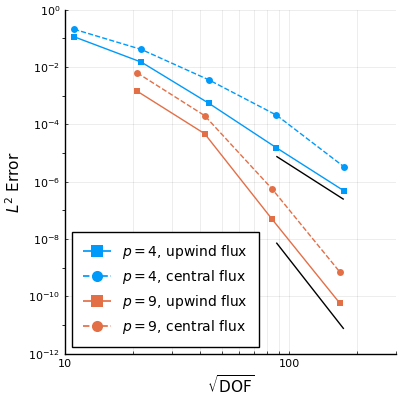

In [5]:
plot_analysis(refinement_analysis, refinement_results, xlims=(10.0, 200.0),
    ylims=(1.0e-12,1.0), reference_line=[(5,4.0e4), (10,2.0e11)],
    filename="plots/multi_p4p9.pdf")